
     # Jose Python Assignment
     
     ## Istall Biopython


In [2]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
from Bio.Data import CodonTable
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import GC
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#sources

https://www.biostars.org/p/77442/ ### fasta file extractions

https://biopython.org/wiki/SeqIO ### Biopython SeqIO website

https://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline ### matplot 

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html ### group by function

https://seaborn.pydata.org/generated/seaborn.lmplot.html ### seaborn plot 

https://canvas.iastate.edu/courses/52516/assignments/701333 ### seaborn plot 




https://eeob-biodata.github.io/EEOB-BCB-546X/schedule.html 

Week 9
October 15-19

Lecture 14: Introduction to Python [website]
Lecture 15: Introduction to Python Datatypes and Packages [website]
Week 10
October 24-26

Lecture 16: Working With Pandas DataFrames in Python [website]
Lecture 17:
Summarizing DataFrames [website]
Indexing, Slicing, Subsetting, and Iterating DataFrames in Python [website]
Week 11
October 31 - November 2

Lecture 18:
Changing Values in a DataFrame [website]
Visualizing Data in Python [website]
Lecture 19: Visualizing Data in Python, continued [website]
Week 12
November 7 - 9

Lecture 20: Introduction to BioPython [slides]
Lecture 21: More BioPython [slides]




### FUNCTIONS ###

#-- Functions --#
## 1. 


In [3]:
def get_sequences_from_file(fasta_fn): ##Extract sequence from a fast file
    sequence_data_dict = {} ##build a sequence data dictionary where you can add stuff
    for record in SeqIO.parse(fasta_fn, "fasta"): # use Biopython SeqIO to loop in the fasta file 
        description = record.description.split() # splits and saves a stings, names it  discription  
        species_name = description[1] + " " + description[2] # looks like we are pulling out the species name from part 1 and 2 on the discription file we created 
        sequence_data_dict[species_name] = record.seq #add speciaes name to to thedictionary created 
    return(sequence_data_dict)# return the new dictionary

## 2 ##


In [18]:
def translate_function(string_nucleotides): 
    DNA_string=str(string_nucleotides)
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]## read in the translation table
    aa_seq_string = "" ## create an empty string for aa
    for i in [0, len(DNA_string), 3]: ## read through codons on the string, stop at a stop codon, every 3rd position in string_nucleotides to get the codon
        codon = DNA_string[i:i+3]
        if codon in ["TAA", "TAG", "AGA", "AGG"]: ## tells the code to stop translating if their is a stop codon 
            break
        else:
            aa_seq_string += mito_table.forward_table[codon]
    return(aa_seq_string) ## we then retun the amino acid sequence of our aa string 


## 3 ##


In [19]:
def alt_translate_fxn(string_nucleotides): ## uses biopython to define the function
    DNAcode = Seq(str(string_nucleotides), IUPAC.unambiguous_dna) ## create a Seq object
    aa_protine_string = DNAcode.translate(table = "Vertebrate Mitochondrial", to_stop = True) ## translates the vertebrate mitocondrial table using seq biopython functions
    return (aa_protine_string) ## returns the translated amino acid sequence


## 4 ##


In [20]:
def compute_molecular_weight(aa_seq): # define aa as string
    analysed_aa_seq =ProteinAnalysis(aa_seq) # you can analize the protine sequence with ProteinAnalysis()
    return(analysed_aa_seq.molecular_weight()) # .molecular_weight() will give you the value of the molecuular weight in a specific sequence 

## 5 ##
####### YOUR GC CONTENT ANALYSIS FUNCTION ########
## Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.




#%%%%%%%%%%%%%%#
###   MAIN   ###
#%%%%%%%%%%%%%%#

cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 

bears_df = pd.read_csv("bears_mass.csv") # Includes only data for body mass 
species_list = list(bears_df.species)

In [21]:
def GC_content(DNA_string): # define function
    return((DNA_string.count("C")+DNA_string.count("G"))/(len(DNA_string)))

## 6 ## 
## Add two new columns to the bears DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.

In [24]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 
bears_df = pd.read_csv("bears_mass.csv") 
species_list = list(bears_df.species)

for index, row in bears_df.iterrows(): 
    bears_df.loc[index, 'M_W']='NaN' 
    bears_df.loc[index, 'GC_content']='NaN' 
bears_df 

,species,mass,M_W,GC_content
0,Ursus spelaeus,550.800,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN
5,Helarctos malayanus,47.020,NaN,NaN
6,Ailuropoda melanoleuca,118.200,NaN,NaN
7,Tremarctos ornatus,140.700,NaN,NaN
8,Ursus maritimus,425.100,NaN,NaN


## 7 ##


In [25]:
for key, value in cytb_seqs.items(): 
    aa_seq_string =alt_translate_fxn(value) 
    mw=compute_molecular_weight(str(aa_seq_string)) 
    GC=GC_content(value) 
    for index, row in bears_df.iterrows(): 
        if bears_df.loc[index, "species"]==key:
            bears_df.loc[index, "GC_content"]=GC 
            bears_df.loc[index, "M_W"]=mw
bears_df

,species,mass,M_W,GC_content
0,Ursus spelaeus,550.800,42458.8,0.437719
1,Ursus arctos,203.500,42414.7,0.437719
2,Ursus thibetanus,99.714,42306.7,0.45614
3,Melursus ursinus,100.030,42552,0.451754
4,Ursus americanus,110.560,42427.7,0.439474
5,Helarctos malayanus,47.020,42560.9,0.442982
6,Ailuropoda melanoleuca,118.200,42702.2,0.407895
7,Tremarctos ornatus,140.700,42384.8,0.44386
8,Ursus maritimus,425.100,42454.8,0.442982


## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the largest bear species? 
The largest bear species is spelaeus
## *Q2* What else is interesting about this species?
It is way bigger than 50% of the other bears 

Text(0.5,1,'Bear species mass')

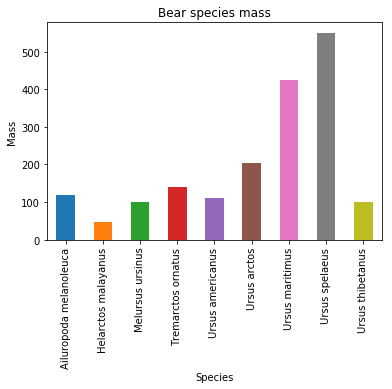

In [26]:
%matplotlib inline
bears_df.groupby('species')["mass"].describe()['mean'].plot(kind="bar")
plt.xlabel('Species')
plt.ylabel('Mass')
plt.title('Bear species mass')

## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

Text(49.7842,0.5,'Molecular_weight')

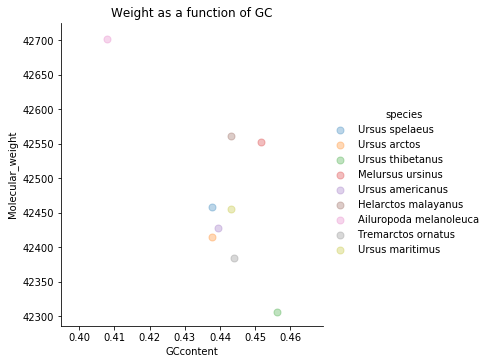

In [31]:
sns.lmplot("GC_content", "M_W", data=bears_df, fit_reg=False, 
           scatter_kws={'alpha':0.3,"s": 50}, hue='species') 
plt.title('Weight as a function of GC')
plt.xlabel('GCcontent')
plt.ylabel('Molecular_weight')

## 10 ##
## Save the new DataFrame to a file called "bears_mass_cytb.csv"

In [ ]:
bears_df.to_csv("bears_mass_cytb.csv")

## 11 - BONUS ##
## What else can we do with this dataset in Python? 
## Add functions or anything that might be interesting and fun. (optional)

Text(45.6378,0.5,'GC_content')

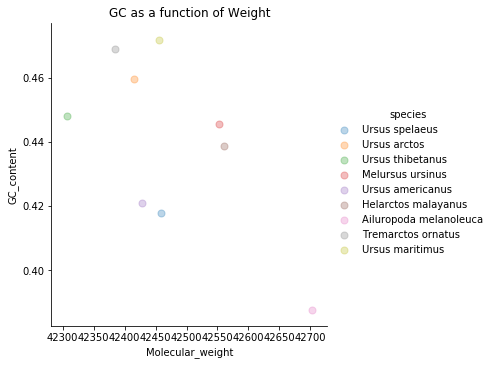

In [82]:
sns.lmplot(x="M_W", y="GC_content", data=bears_df, fit_reg=False, 
           scatter_kws={'alpha':0.3,"s": 50}, hue='species',logistic=True,y_jitter=.03) 
plt.title('GC as a function of Weight')
plt.xlabel('Molecular_weight')
plt.ylabel('GC_content')

Text(0.5,1,'Bear M_W')

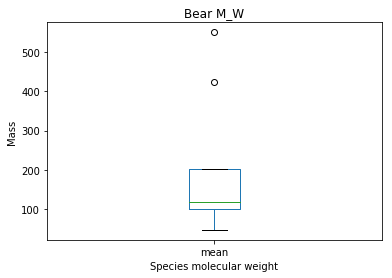

In [53]:
bears_df.groupby('M_W')["mass"].describe()['mean'].plot(kind="box")
plt.xlabel('Species molecular weight')
plt.ylabel('Mass')
plt.title('Bear M_W')

Text(0.5,1,'Bear G_C content')

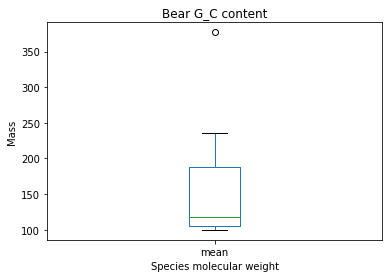

In [59]:
bears_df.groupby('GC_content')["mass"].describe()['mean'].plot(kind="box")
plt.xlabel('Species molecular weight')
plt.ylabel('Mass')
plt.title('Bear G_C content')

Text(0.5,1,'Bear species mass')

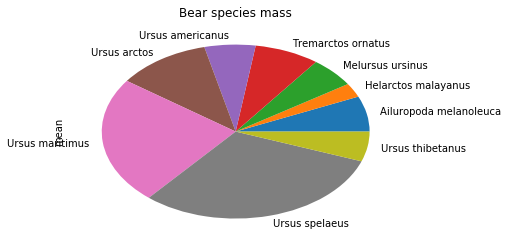

In [68]:
bears_df.groupby('species')["mass"].describe()['mean'].plot(kind="pie")
plt.title('Bear species mass')

Text(0.5,1,'Bear M_W')

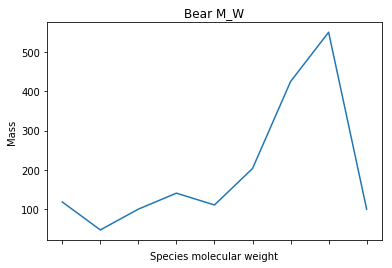

In [73]:
bears_df.groupby('species')["mass"].describe()['mean'].plot(kind="line")
plt.xlabel('Species molecular weight')
plt.ylabel('Mass')
plt.title('Bear M_W')